# Telco Customer Churn Analysis

## Objective:

#### The analysis explores customer churn patterns, focusing on various factors such as paymen methods, contract types, tenure, and demographic attributes. The goal is to identify whih factors are most strongly associated with higher churn rates to guide customer retenton strategies.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset into a pandas DataFrame
df = pd.read_csv("Customer Churn.csv")
# Display the first few rows of the dataset to verify the data load
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Summary of the dataset to understand the structure and identify missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#  Replacing space with '0' on TotalCharges
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

## Data Processinig

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Checking for missing values in the dataset
df.isnull().sum().sum()

0

In [9]:
# Basic statistics of numerical columns to get an overview of the data distribution
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
# Checking for duplicate values in the dataset
df.duplicated().sum()

0

In [11]:
# Checking for duplicate values in the Primary Key.
df["customerID"].duplicated().sum()

0

In [12]:
# Convert 0 and 1 with "Yes" and "No" for more accessible, interpretable, and consistent
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Analysis

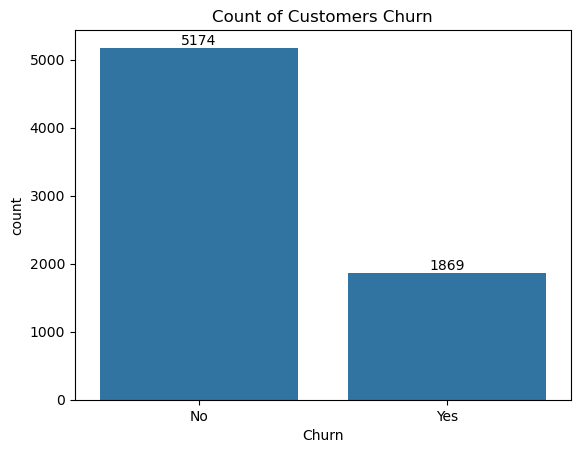

In [15]:
# plotting a bar chart for Churn and it's count
ax = sns.countplot(x= "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers Churn")
plt.show()

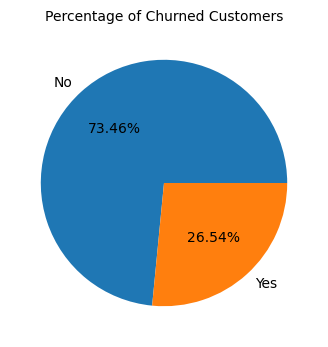

In [16]:
# plotting a pie chart for Churn percentage
plt.figure (figsize = (4,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10) 
plt.show()

### From the given pie chart we can conclude that 26.54% of our customers have churned out.

## Now let's explore the cause behind it.

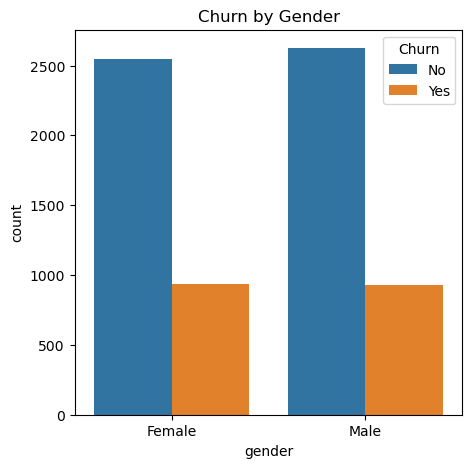

In [19]:
# plotting a group chart for Churn by Gender
plt.figure(figsize = (5,5))
sns.countplot(x= "gender", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title("Churn by Gender")
plt.show()

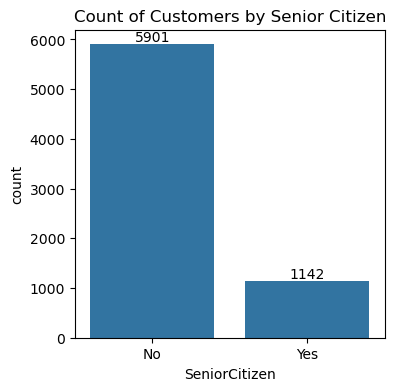

In [20]:
# plotting a bar chart for SeniorCitizen and it's count
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

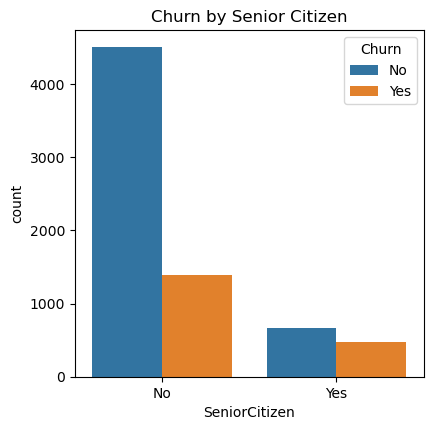

In [21]:
# plotting a group chart for Churn by Senior Citizen
plt.figure(figsize = (4.5,4.5))
sns.countplot(x= "SeniorCitizen", data = df, hue = "Churn")

plt.title("Churn by Senior Citizen")
plt.show()

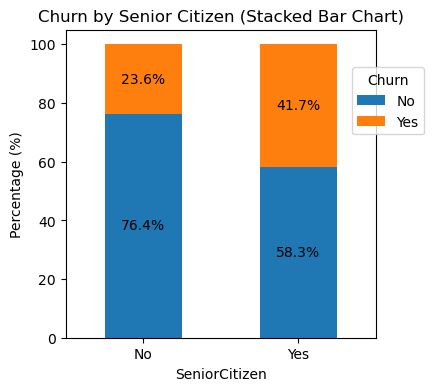

In [22]:
# plotting a Stacked Bar Chart Churn by Senior Citizen
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4)) 

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()


## Comparative a greater pecentage of people in senior citizen category have churned.

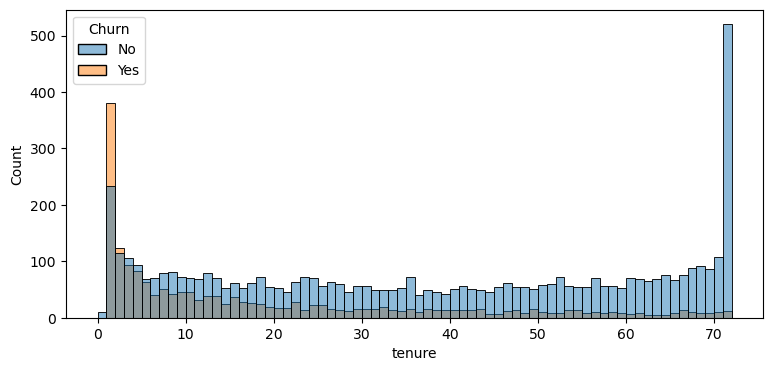

In [24]:
# plotting a histogram by tenur
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

## People who have used our services for a long time have stayed and people who have used our sevices.

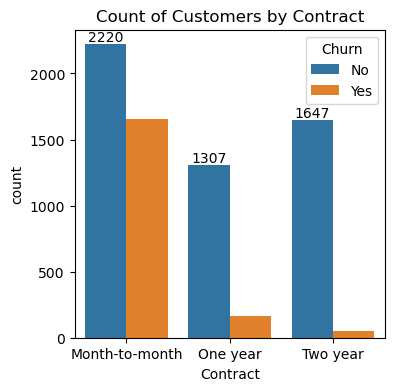

In [26]:
# plotting a group chart for Churn by Contract
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

### People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 


In [28]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

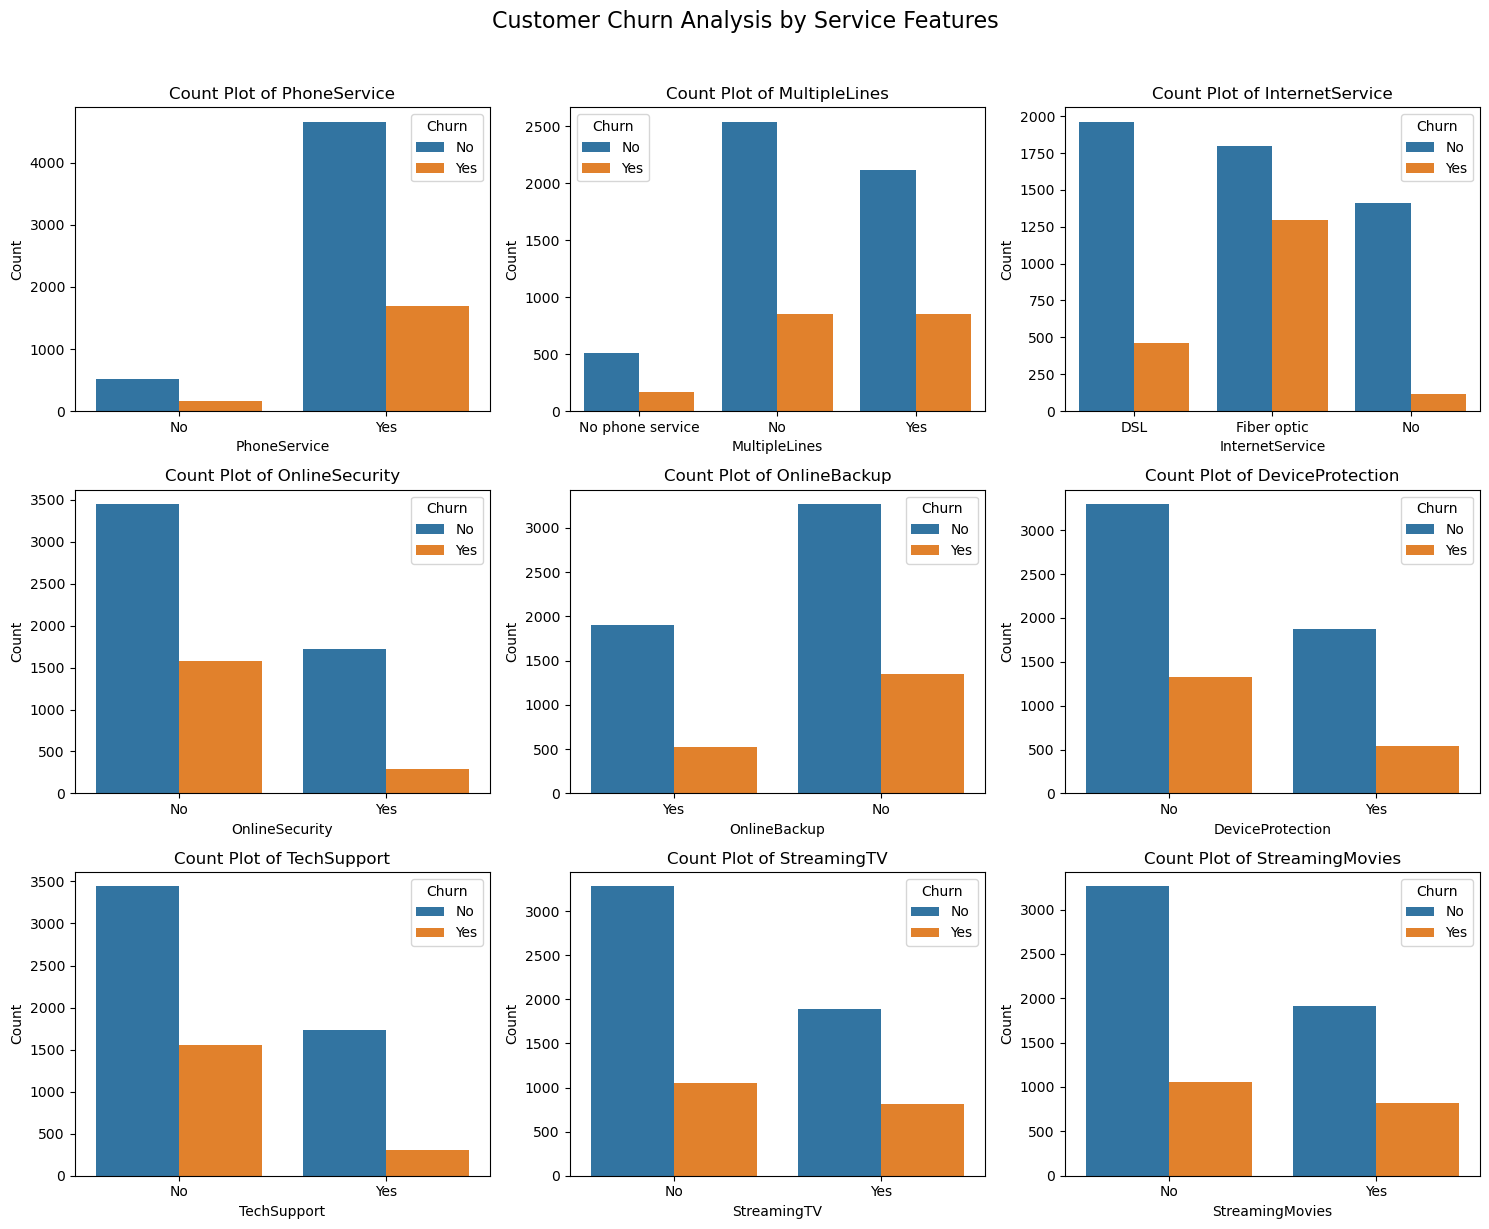

In [29]:
# Analyzing churn based on different features and services
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Add an overall title for the entire figure
fig.suptitle('Customer Churn Analysis by Service Features', fontsize=16, y=1.02)

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

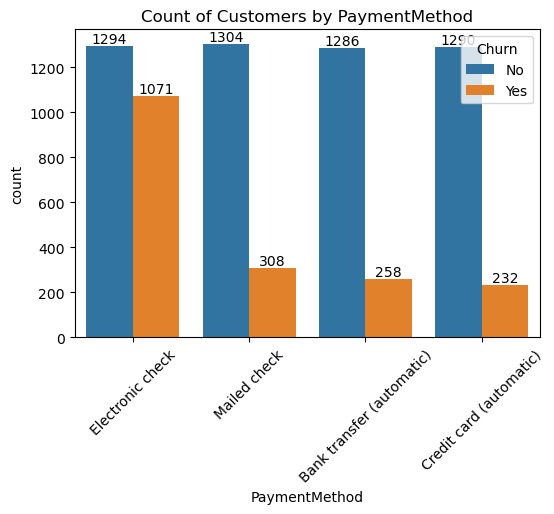

In [31]:
# plotting a group chart for Churn by Payment Method
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

### Customer is likely to churn when he is using electronic check as a payment method.

# Key Insights & Findings:

### ● Contract Type and Churn:
   - **Customers on month-to-month contracts exhibit the highest churn rate, with 42% of such customers likely to churn.**
   - In contrast, customers on one-year and two-year contracts have churn rates of 11% and 3%, respectively.
   - **Implication:** Longer contract periods serve as a strong retention tool, as customers with extended commitments are far less likely to leave.

### ● Payment Methods and Churn:
   - **Customers paying via electronic checks show the highest churn rate at 45%,** while those using credit cards, bank transfers, or mailed checks have significantly lower churn rates, averaging around 15-18%.
   - **Implication:** The convenience, security, and trust issues related to electronic payments might be contributing factors. Encouraging customers to switch to more stable payment methods could reduce churn.

### ● Churn by Tenure:
   - **Customers with less than one year of tenure are the most likely to churn, with a 50% churn rate.** Those with 1-3 years of tenure show a decreasing churn trend at 35%, while customers who have been with the company for more than three years have a churn rate of just 15%.
   - **Implication:** Engaging customers early in their journey, especially within the first year, is critical for retention.

### ● Churn by Internet Service Type:
   - **Customers using Fiber Optic services show a higher churn rate of 30%,** compared to DSL customers with a churn rate of 20%.
   - **Implication:** This could be due to increased competition or dissatisfaction with service quality. Understanding customer satisfaction with service speed and reliability may help retain fiber optic users.

### ● Senior Citizens and Churn:
   - The analysis reveals that **senior citizens (aged 65+) have a churn rate of 41%,** compared to a 26% churn rate among non-senior citizens.
   - **Implication:** Special retention programs and targeted customer service for senior customers may help reduce churn in this demographic.

# Visualizations & Data Insights:

### ● Bar Charts and Line Graphs:
   - The visual representation of churn by payment method clearly shows that **customers using electronic checks churn almost three times as much** as those using more traditional or secure methods like credit cards.
   - **Customer tenure vs. churn rate** visualizations reveal a clear declining trend in churn as customers' tenure increases, underscoring the need for early-stage customer loyalty programs.

### ● Percentage Distribution of Churn Across Factors:
   - **Payment Methods:** 45% churn for electronic check users, 15% for credit card users.
   - **Contract Types:** 42% churn for month-to-month contracts, 11% for yearly contracts, 3% for two-year contracts.
   - **Tenure:** 50% churn in the first year, dropping to 15% after three years.

# Recommendations:

### ● Promote Long-Term Contracts:
   Offer incentives for customers to commit to longer contracts to reduce churn.

### ● Address Payment Method Concerns:
   Implement campaigns encouraging customers to switch from electronic checks to more reliable payment methods.

### ● Customer Engagement in Early Tenure:
   Focus on improving the customer experience within the first year, as churn is highest in this period.

### ● Special Senior Citizen Retention Programs:
   Create personalized offers or assistance programs to retain the senior demographic.
